In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

# Fetch Data

In [14]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

dim_ethan = 58
dim_ethen = 48
dim_ethin = 38

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset_ethan, molecules_ethan = make_butadien_dataset(
    np.load("ethan/molecules_ethan_6-31g**.npy"),
    *load_triu(*np.load("ethan/dataset_ethan_6-31g**.npy"), dim_ethan), 
)

dataset_ethen, molecules_ethen = make_butadien_dataset(
    np.load("ethen/molecules_ethen_6-31g**.npy"),
    *load_triu(*np.load("ethen/dataset_ethen_6-31g**.npy"), dim_ethen), 
)

dataset_ethin, molecules_ethin = make_butadien_dataset(
    np.load("ethin/molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("ethin/dataset_ethin_6-31g**.npy"), dim_ethin), 
)

[-] 2018-04-23 00:02:19: Data set normalized. Mean value std: 0.006816185644372876
[-] 2018-04-23 00:02:19: Data set normalized. Mean value std: 0.015522870399034699
[-] 2018-04-23 00:02:19: Data set normalized. Mean value std: 0.026441138734234378


# Ethan
dim = 58 

dim^2 = 3364

dim_ut = 1711

In [15]:
dim_ethan_triu = int(dim_ethan * (dim_ethan + 1) / 2)

In [27]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer
from SCFInitialGuess.nn.cost_functions import RegularizedMSE


graph = tf.Graph()

trainer = Trainer(
    EluTrNNN([dim_ethan_triu, dim_ethan_triu, dim_ethan_triu]),
    cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup(target_graph=graph)
network, sess = trainer.train(
    dataset_ethan,
    convergence_threshold=5e-7
)
graph = trainer.graph

[ ] 2018-04-23 00:32:33: Appending to graph: <tensorflow.python.framework.ops.Graph object at 0x7fd73c199208>
[-] 2018-04-23 00:32:33: Setting up the training in the target graph ...
[-] 2018-04-23 00:32:33: network ...
[-] 2018-04-23 00:32:33: error function ...
[-] 2018-04-23 00:32:33: cost function ...
[-] 2018-04-23 00:32:33: training step
[-] 2018-04-23 00:32:34: Starting network training ...
[ ] 2018-04-23 00:32:34: Val. Cost: 2.036E-02. Error: 2.034E-02. Diff: 1.0E+10
[ ] 2018-04-23 00:32:41: Val. Cost: 2.084E-04. Error: 1.868E-04. Diff: 2.0E-02
[ ] 2018-04-23 00:32:49: Val. Cost: 1.694E-04. Error: 1.484E-04. Diff: 3.8E-05
[ ] 2018-04-23 00:32:58: Val. Cost: 1.225E-04. Error: 1.018E-04. Diff: 4.7E-05
[ ] 2018-04-23 00:33:07: Val. Cost: 1.515E-04. Error: 1.313E-04. Diff: 2.9E-05
[ ] 2018-04-23 00:33:15: Val. Cost: 1.434E-04. Error: 1.239E-04. Diff: 7.3E-06
[ ] 2018-04-23 00:33:23: Val. Cost: 2.202E-04. Error: 2.016E-04. Diff: 7.8E-05
[ ] 2018-04-23 00:33:32: Val. Cost: 1.772E-04.

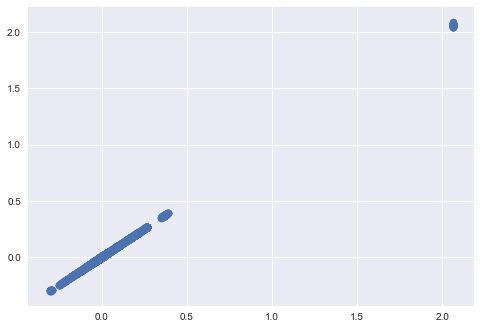

In [22]:
plt.scatter(
    dataset_ethan.testing[1],
    network.run(sess, dataset_ethan.testing[0])
)
plt.show()